In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [9]:
#Handle Missing Values
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column due to too many missing values
df.drop(columns=['Cabin'], inplace=True)


<ipython-input-9-40089d56be36>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-9-40089d56be36>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [10]:
#Encode Categorical Features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [11]:
#Normalize/Standardize Numerical Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


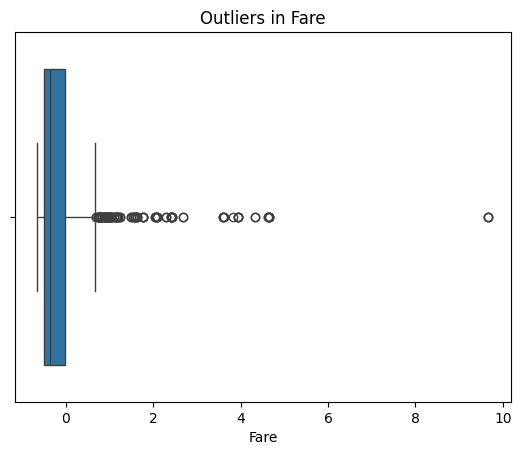

In [13]:
#Visualize and Remove Outliers
# Boxplot
sns.boxplot(x=df['Fare'])
plt.title("Outliers in Fare")
plt.show()

# Remove outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]


In [15]:
df.info()
df.describe()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    int64  
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked_Q   775 non-null    bool   
 11  Embarked_S   775 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 68.1+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True
5,6,0,3,"Moran, Mr. James",0,-0.104637,0,0,330877,-0.478116,True,False


In [16]:
df.to_csv('cleaned_titanic.csv', index=False)
